In [33]:
import pandas as pd
import numpy as np
from utils.forest_infer import pred_multi
from utils.metrics import print_metrics
import glob
from tqdm import tqdm
from utils.forest_infer import pred_multi
from xgboost import XGBClassifier
import gc
from catboost import CatBoostClassifier

In [34]:
df_pairs  = pd.read_csv("/workspace/Manual_Verification_Dedup_POIs_Final_cleaned_features.csv")

In [35]:
# df_pairs = pd.read_parquet("/workspace/clustering/outputs/df_pairs_features_EGY_30.parquet")

In [36]:
features = ['similarity', 'haversine', 'name_davies',
       'name_leven', 'name_dice', 'name_jaro', 'name_set_ratio',
       'street_davies', 'street_leven', 'street_jaro', 'email_davies',
       'email_leven', 'email_jaro', 'url_davies', 'url_leven', 'url_jaro',
       'brands_davies', 'brand_leven', 'brand_jaro', 'phone_lcs',
       'subcat_WRatio', 'subcat_ratio', 'subcat_token_set_ratio',
       'Is_direction_match_0', 'Is_direction_match_1', 'Is_direction_match_2',
       'Is_house_match_0', 'Is_house_match_1', 'Is_house_match_2',
       'Is_category_match_0', 'Is_category_match_1', 'Is_subcategory_match_0',
       'Is_subcategory_match_1', 'Is_subcategory_match_2', 'Is_brand_match_0',
       'Is_brand_match_1', 'Is_brand_match_2', 'Is_brand_match_3',
       'Is_related_cat_0', 'Is_related_cat_1', 'Is_name_number_match_0',
       'Is_name_number_match_1', 'Is_name_number_match_2',
       'Is_name_number_match_3', 'is_phone_match_1', 'is_phone_match_2',
       'is_phone_match_3', 'is_phone_match_4', 'Is_email_match_0',
       'Is_email_match_1', 'Is_email_match_2', 'Is_url_match_0',
       'Is_url_match_1', 'Is_url_match_2']

# Lightgbm inference

In [37]:
models = glob.glob(f"/workspace/models/model_duplicate_gsplit_lgb*")

In [38]:
all_pred = []
for model_file in tqdm(models):
    prediction = pred_multi(model_file,df_pairs[features])
    all_pred.append(prediction)
    
all_pred = np.array(all_pred)
pred = np.mean(all_pred, axis=0)
df_pairs["prediction_lgb_probab"] = pred
df_pairs["prediction_lgb"] = pred>0.5
df_pairs["prediction_lgb"] = df_pairs["prediction_lgb"]*1

  0%|          | 0/5 [00:00<?, ?it/s]

[W] [07:12:06.720272] Treelite currently does not support float64 model parameters. Accuracy may degrade slightly relative to native LightGBM invocation.


  0%|          | 0/4 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:00<00:03,  1.12it/s]

[W] [07:12:07.615017] Treelite currently does not support float64 model parameters. Accuracy may degrade slightly relative to native LightGBM invocation.


  0%|          | 0/4 [00:00<?, ?it/s]

 40%|████      | 2/5 [00:01<00:01,  1.65it/s]

[W] [07:12:08.022317] Treelite currently does not support float64 model parameters. Accuracy may degrade slightly relative to native LightGBM invocation.


  0%|          | 0/4 [00:00<?, ?it/s]

 60%|██████    | 3/5 [00:01<00:00,  2.00it/s]

[W] [07:12:08.393383] Treelite currently does not support float64 model parameters. Accuracy may degrade slightly relative to native LightGBM invocation.


  0%|          | 0/4 [00:00<?, ?it/s]

 80%|████████  | 4/5 [00:01<00:00,  2.32it/s]

[W] [07:12:08.719278] Treelite currently does not support float64 model parameters. Accuracy may degrade slightly relative to native LightGBM invocation.


  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


In [39]:
fig_conf= print_metrics(df_pairs["duplicate_flag"],df_pairs["prediction_lgb"])

KeyError: 'duplicate_flag'

# Xgboost inference

In [ ]:
models = glob.glob(f"/workspace/models/xgboost_dedup_v2_*")

In [ ]:
def pred_multi_xgb(model_file,df):
    xgb_model = XGBClassifier()
    xgb_model.load_model(model_file)
    prediction = xgb_model.predict_proba(df)[:, 1]
    del xgb_model
    gc.collect()
    return prediction

In [ ]:
all_pred = []
for model_file in tqdm(models):
    prediction = pred_multi_xgb(model_file,df_pairs[features])
    all_pred.append(prediction)
    
all_pred = np.array(all_pred)
pred = np.mean(all_pred, axis=0)
df_pairs["prediction_xgb_probab"] = pred
df_pairs["prediction_xgb"] = pred>0.5
df_pairs["prediction_xgb"] = df_pairs["prediction_xgb"]*1

100%|██████████| 5/5 [00:02<00:00,  2.21it/s]


0.9973552680083806


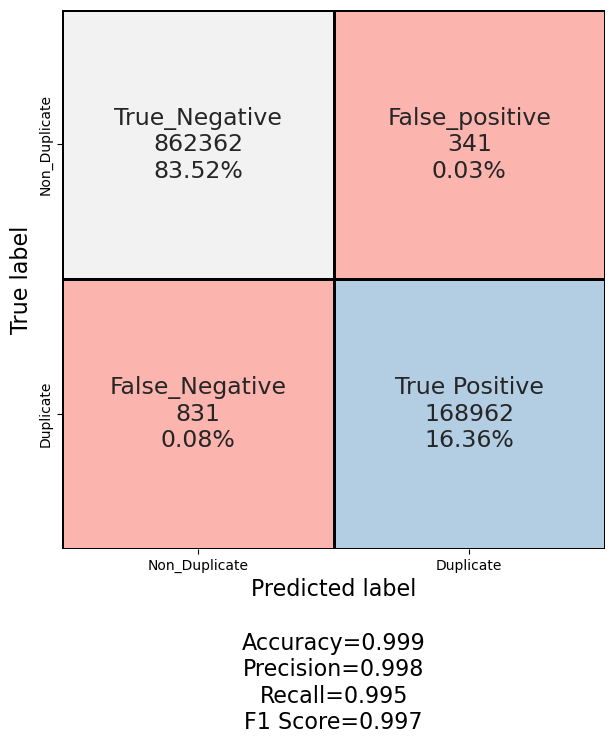

In [ ]:
fig_conf= print_metrics(df_pairs["duplicate_flag"],df_pairs["prediction_xgb"])

# catboost inference

In [ ]:
models = glob.glob(f"/workspace/models/catboost_dedup_*")

In [ ]:
def pred_multi_catboost(model_file,df):
    xgb_model = CatBoostClassifier()
    xgb_model.load_model(model_file)
    prediction = xgb_model.predict_proba(df)[:, 1]
    del xgb_model
    gc.collect()
    return prediction

In [ ]:
all_pred = []
for model_file in tqdm(models):
    prediction = pred_multi_catboost(model_file,df_pairs[features])
    all_pred.append(prediction)
    
all_pred = np.array(all_pred)
pred = np.mean(all_pred, axis=0)
df_pairs["prediction_catboost_probab"] = pred
df_pairs["prediction_catboost"] = pred>0.5
df_pairs["prediction_catboost"] = df_pairs["prediction_catboost"]*1

100%|██████████| 5/5 [00:02<00:00,  2.44it/s]


0.9975108077221542


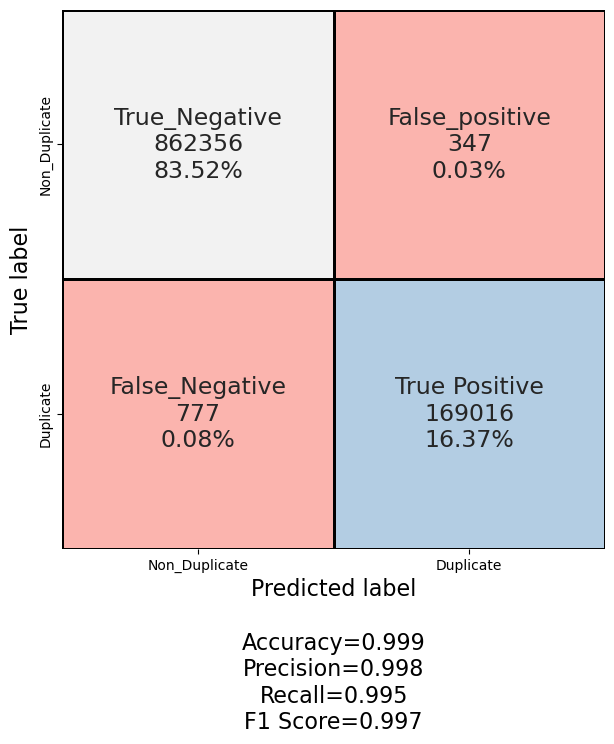

In [ ]:
fig_conf= print_metrics(df_pairs["duplicate_flag"],df_pairs["prediction_catboost"])

In [ ]:
df_pairs.columns

Index(['country', 'placeId1', 'placeId2', 'sourceNames1', 'sourceNames2',
       'category1', 'category2', 'brands1', 'brands2', 'email1', 'email2',
       'latitude1', 'longitude1', 'latitude2', 'longitude2', 'houseNumber1',
       'houseNumber2', 'streets1', 'streets2', 'cities1', 'cities2',
       'subCategory1', 'subCategory2', 'phoneNumbers1', 'phoneNumbers2',
       'internet1', 'internet2', 'postalCode1', 'postalCode2',
       'duplicate_flag', 'similarity', 'haversine', 'name_davies',
       'name_leven', 'name_dice', 'name_jaro', 'name_set_ratio',
       'street_davies', 'street_leven', 'street_jaro', 'email_davies',
       'email_leven', 'email_jaro', 'url_davies', 'url_leven', 'url_jaro',
       'brands_davies', 'brand_leven', 'brand_jaro', 'phone_lcs',
       'subcat_WRatio', 'subcat_ratio', 'subcat_token_set_ratio',
       'Is_direction_match_0', 'Is_direction_match_1', 'Is_direction_match_2',
       'Is_house_match_0', 'Is_house_match_1', 'Is_house_match_2',
       'Is_ca

In [ ]:
df_pairs[(df_pairs["duplicate_flag"]==1) & (df_pairs["prediction_lgb"]==0)  & (df_pairs["prediction_xgb"]==0)  & (df_pairs["prediction_catboost"]==0)].to_csv("/workspace/all_model_0_dup1.csv",index=None)